In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Text(0.5, 1.0, 'Count of records for target categories')

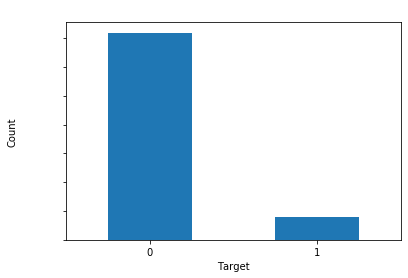

In [3]:
df_train['target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count') #, color='white'
plt.xticks(rotation=360)
# plt.yticks(color='white')
plt.title('Count of records for target categories') #, color='white'

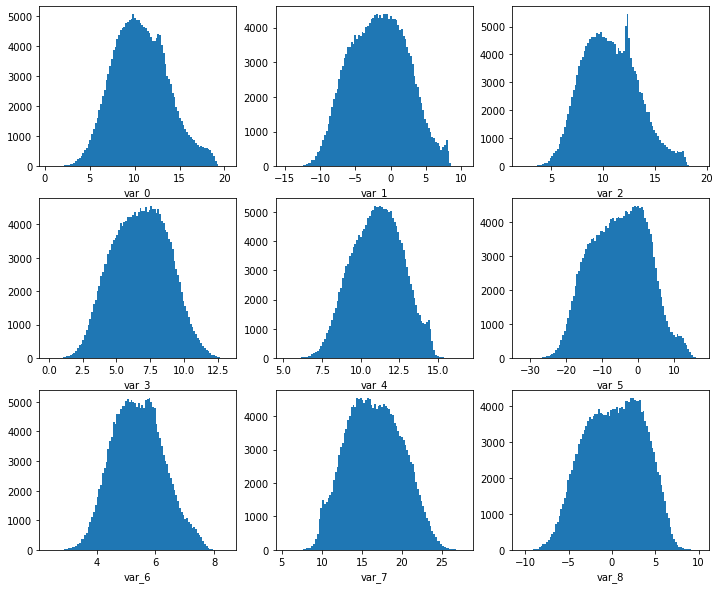

In [4]:
plt.figure(100, figsize=(12,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.hist(x='var_' + str(i), data=df_train, bins=100)
    plt.xlabel('var_' + str(i)) #, color='white'
#     plt.xticks(color='white')
#     plt.yticks(color='white')

Text(0.5, 1, 'Heatmap of the correlation matrix')

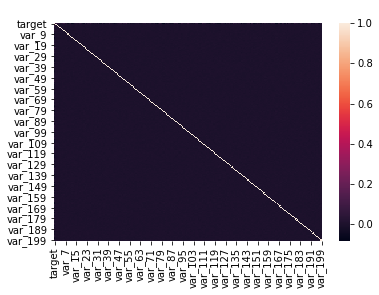

In [5]:
sns.heatmap(df_train.corr())
# plt.xticks(color='white')
# plt.yticks(color='white')
plt.title('Heatmap of the correlation matrix', color='white')

In [6]:
df_0 = df_train[df_train['target']==0].reset_index(drop=True).loc[1:20000,:]
df_1 = df_train[df_train['target'] == 1].reset_index(drop=True)
df_train_subsample = df_0.append(df_1)

In [7]:
df_train_subsample = df_train_subsample.sample(frac=0.5).reset_index(drop=True)
df_train_subsample['target'].value_counts()

0    10030
1    10019
Name: target, dtype: int64

In [8]:
df_train_subsample2 = df_train.sample(frac=0.25)
df_train_subsample2['target'].value_counts()

0    44990
1     5010
Name: target, dtype: int64

In [9]:
x = df_train_subsample2.drop(['ID_code','target'], axis=1)
y = df_train_subsample2['target']
# x = df_train.drop(['ID_code', 'target'], axis=1)
# y = df_train['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=35)

In [10]:
print(' Training counts:') 
print(y_train.value_counts())
print('------------------------------')
print('Testing counts:')
print( y_test.value_counts())
print('------------------------------')

 Training counts:
0    33774
1     3726
Name: target, dtype: int64
------------------------------
Testing counts:
0    11216
1     1284
Name: target, dtype: int64
------------------------------


In [11]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

Text(0.5, 1.0, 'Principal Component Analysis of the tranining data')

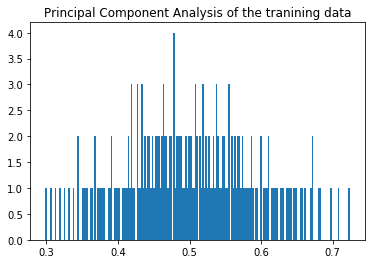

In [12]:
pca = PCA()
pca.fit(x_train)
plt.hist(pca.explained_variance_ratio_*100,bins=200)
plt.title('Principal Component Analysis of the tranining data')

In [13]:
# K-Means

kmeans = KMeans(n_clusters=2).fit(x_train)
print('Training accuracy:',round(sum(((kmeans.labels_ - y_train)**2))/y_train.shape[0],2))
print('Testing accuracy:',round(sum(((kmeans.predict(x_test) - y_test)**2))/y_test.shape[0],2))

Training accuracy: 0.46
Testing accuracy: 0.45


In [14]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred_gaussian = gaussian.predict(x_test)
acc_gaussian_train = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian_test  = round(gaussian.score(x_test,y_test)    * 100, 2)
print('Training accuracy:', acc_gaussian_train)
print('Test accuracy:', acc_gaussian_test)
print('5-Fold Cross validated Test accuracy:',round(cross_val_score(gaussian, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 92.4
Test accuracy: 89.47
5-Fold Cross validated Test accuracy: 91.08


In [15]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
acc_knn_train = round(knn.score(x_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(x_test,y_test)*100,2)
print('Training accuracy:', acc_knn_train)
print('Testing accuracy:',acc_knn_test)
print('5-Fold Cross validated Test accuracy:',round(cross_val_score(knn, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 90.19
Testing accuracy: 89.68
5-Fold Cross validated Test accuracy: 89.75


In [16]:
# Support Vector Machines

svc = SVC(gamma='scale')
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(x_test,y_test)*100,2)
print('Training accuracy:',acc_svc_train)
print('Test accuracy:',acc_svc_test)
print('Cross validated Test accuracy:',round(cross_val_score(svc, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 95.36
Test accuracy: 91.28
Cross validated Test accuracy: 89.96


In [17]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print('Training accuracy:',acc_random_forest_train)
print('Test accuracy:',acc_random_forest_test)
print('Cross validated Test accuracy:',round(cross_val_score(random_forest, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 100.0
Test accuracy: 89.73
Cross validated Test accuracy: 89.73


In [18]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred_perceptron = perceptron.predict(x_test)
acc_perceptron_train = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron_test = round(perceptron.score(x_test,y_test) * 100, 2)
print('Training accuracy:',acc_perceptron_train)
print('Test accuracy:',acc_perceptron_test)
print('Cross validated Test accuracy:',round(cross_val_score(perceptron, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 68.51
Test accuracy: 62.49
Cross validated Test accuracy: 89.19


In [19]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
acc_dt_train = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_dt_test = round(decision_tree.score(x_test,y_test) * 100, 2)
print('Training accuracy:',acc_dt_train)
print('Test accuracy:',acc_dt_test)
print('Cross validated Test accuracy:',round(cross_val_score(decision_tree, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 100.0
Test accuracy: 78.72
Cross validated Test accuracy: 82.61


In [21]:
# AdaBoost

adb = AdaBoostClassifier(n_estimators=200,random_state=0).fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
acc_adb_train = round(adb.score(x_train, y_train) * 100, 2)
acc_adb_test = round(adb.score(x_test,y_test) * 100, 2)
print('Training accuracy:',acc_adb_train)
print('Test accuracy:',acc_adb_test)
print('Cross validated Test accuracy:',round(cross_val_score(adb, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 92.39
Test accuracy: 89.04
Cross validated Test accuracy: 89.88


In [22]:
# XGBoost

xgb = XGBClassifier(objective="binary:logistic", random_state=42).fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
acc_xgb_train = round(xgb.score(x_train, y_train) * 100, 2)
acc_xgb_test = round(xgb.score(x_test,y_test) * 100, 2)
print('Training accuracy:',acc_xgb_train)
print('Test accuracy:',acc_xgb_test)
print('Cross validated Test accuracy:',round(cross_val_score(xgb, x_test, y_test, cv=5).mean()*100,2))

Training accuracy: 90.62
Test accuracy: 89.94
Cross validated Test accuracy: 89.92


In [23]:
# LightGBM

lgbm = LGBMClassifier(bagging_fraction='0.4')
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)
acc_lgbm_train = round(lgbm.score(x_train, y_train) * 100, 2)
acc_lgbm_test = round(lgbm.score(x_test, y_test) * 100, 2)
print('Training accuracy:', acc_lgbm_train)
print('Test accuracy:', acc_lgbm_test)
print('Cross validated Test accuracy:',round(cross_val_score(lgbm, x, y, cv=10).mean()*100,2))

Training accuracy: 94.38
Test accuracy: 90.39
Cross validated Test accuracy: 90.74


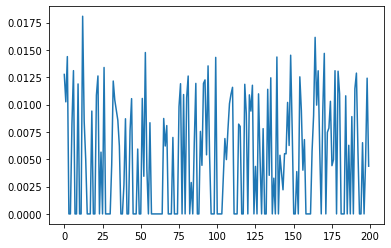

In [24]:
plt.plot(range(len(xgb.feature_importances_)), xgb.feature_importances_)

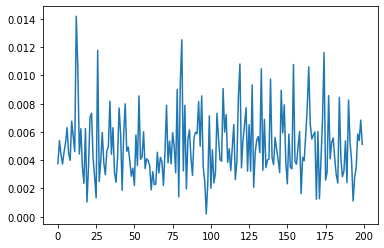

In [25]:
plt.plot(range(0,200),decision_tree.feature_importances_)

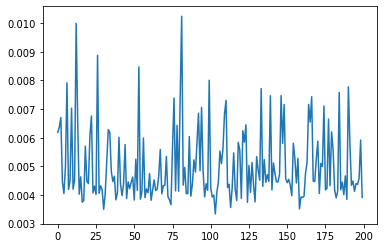

In [26]:
plt.plot(range(0,200),random_forest.feature_importances_)

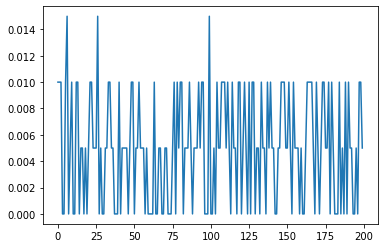

In [27]:
plt.plot(range(0,200),adb.feature_importances_)

In [28]:
# x_train = (df_test - x_train.mean())/x_train.std()
# x_test = (x_test - x_test.mean())/x_test.std()
df_test.head()
# x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
df_test_ID = df_test['ID_code']
df_test_features = df_test.drop(['ID_code'], axis=1)
df_test_norm = ( df_test_features- df_test_features.min())/(df_test_features.max() - df_test_features.min())

In [29]:


y_pred_test = gaussian.predict(df_test_features)

df_final = pd.DataFrame()
df_final['ID_code'] = df_test['ID_code']
df_final['target'] = y_pred_test

In [30]:
df_final.to_csv('submission.csv',index=False)

In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_gaussian)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
tpr

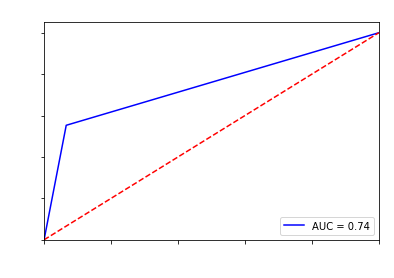

In [32]:
plt.title('ROC for Gaussian Naive Bayes', color='white')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate', color='white')
plt.xlabel('False Positive Rate', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

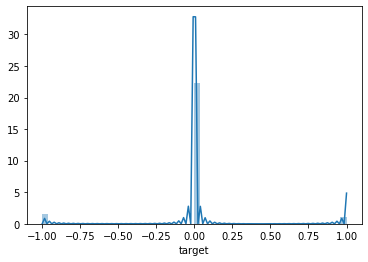

In [33]:
sns.distplot((y_test-y_pred_gaussian), bins=50)

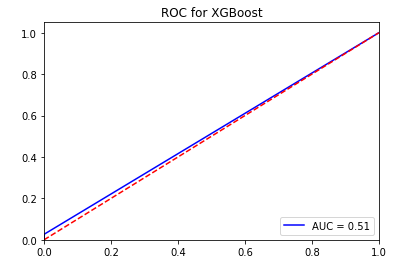

In [34]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC for XGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate', color='white')
plt.xlabel('False Positive Rate', color='white')
# plt.xticks(color='white')
# plt.yticks(color='white')
plt.show()